In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('raw_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# checking of multiple encounters.
number_of_revisits = pd.DataFrame(df.groupby('patient_nbr').count()['encounter_id']).rename(columns={'encounter_id':'number_of_revisit'})

In [5]:
number_of_revisits

,number_of_revisit
patient_nbr,
135,2
378,1
729,1
774,1
927,1
...,...
189351095,1
189365864,1
189445127,1


In [6]:
data = df.copy()

In [7]:
# removing multiple encounters.
data = df.drop_duplicates(keep='first',subset='patient_nbr')
print(f'number of entries removed is {len(df)-len(data)}')

number of entries removed is 30248


In [8]:
data = data.merge(number_of_revisits,how='left',on='patient_nbr')

In [9]:
data.shape

(71518, 51)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 71517
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications       

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,71518.0,1.568156e+08,1.003769e+08,12522.0,81458068.5,144057399.0,2.155513e+08,443867222.0
patient_nbr,71518.0,5.505160e+07,3.947573e+07,135.0,23375767.5,48166798.5,8.752222e+07,189502619.0
admission_type_id,71518.0,2.100254e+00,1.508301e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,71518.0,3.593235e+00,5.269771e+00,1.0,1.0,1.0,3.000000e+00,28.0
admission_source_id,71518.0,5.657457e+00,4.162580e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,71518.0,4.289130e+00,2.949210e+00,1.0,2.0,3.0,6.000000e+00,14.0
num_lab_procedures,71518.0,4.307548e+01,1.995234e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,71518.0,1.430577e+00,1.759864e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,71518.0,1.570503e+01,8.311163e+00,1.0,10.0,14.0,2.000000e+01,81.0
number_outpatient,71518.0,2.800694e-01,1.068957e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [12]:
cols_with_na = [col for col in data.columns if (data[col]=='?').sum()>0]
print(f'Number of columns with nan value = {len(cols_with_na)}\nthey are : {cols_with_na}')

Number of columns with nan value = 7
they are : ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


In [13]:
for col in cols_with_na:
    print(col,np.round(((data[col]=='?').sum())/len(data[col]),4)*100, '% missing data')

race 2.7199999999999998 % missing data
weight 96.00999999999999 % missing data
payer_code 43.41 % missing data
medical_specialty 48.209999999999994 % missing data
diag_1 0.02 % missing data
diag_2 0.41000000000000003 % missing data
diag_3 1.71 % missing data


- features like (race, diag_1, diag_2, diag_3) can be imputed with suitable null value imputation method. 

- weight has nearly 96% of null values. so it is better to remove the feature.

- for feature payer_code and medical_speciality we can check it's importance with the target variable and decide whether to drop or impute the feature.

* This project focuses on whether the readmisson has taken place less than 30 days from discharge.
* we can group "NO" and ">30" together as "0" and  "<30" as "1"

In [14]:
data['readmitted'] = data['readmitted'].replace({'NO':0,'>30':0,'<30':1})

In [15]:
data['readmitted'].value_counts()

0    65225
1     6293
Name: readmitted, dtype: int64

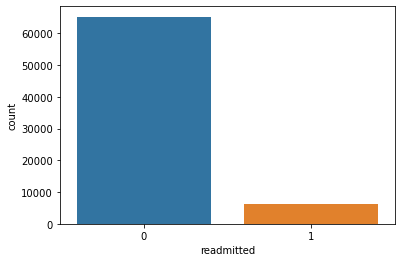

In [16]:
sns.countplot(data['readmitted'])
plt.show()

In [17]:
def data_check(i):
    print(f'feature : {i}\nnunique = {data[i].nunique()}\nunique values = {data[i].unique()}')
    category = data[i].unique()
    if len(category) < 50:
        for j in range(0,len(category)):
            print(f'{category[j]:18}:{len(data[data[i]==category[j]]):3}    :{round(len(data[data[i]==category[j]])*100/len(data),2):7}%')
        sns.countplot(data[i],hue=data['readmitted'])
        plt.xticks(rotation=90)
        plt.show()
    else :
        print(f'****unique values greater than 50****')
    if '?' in category:
        print('****Null values present****',round(len(data[data[i]=='?'])*100/len(data),2),'%')
    print('-'*50,'\n','-'*50)

In [18]:
print(data.columns.values)

['encounter_id' 'patient_nbr' 'race' 'gender' 'age' 'weight'
 'admission_type_id' 'discharge_disposition_id' 'admission_source_id'
 'time_in_hospital' 'payer_code' 'medical_specialty' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted' 'number_of_revisit']


In [19]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [20]:
all_cols = data.columns
dummy_encode = set()
label_encode = set()
to_drop = set()

In [21]:
len(all_cols)

49

feature : race
nunique = 6
unique values = ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Caucasian         :53491    :  74.79%
AfricanAmerican   :12887    :  18.02%
?                 :1948    :   2.72%
Other             :1178    :   1.65%
Asian             :497    :   0.69%
Hispanic          :1517    :   2.12%


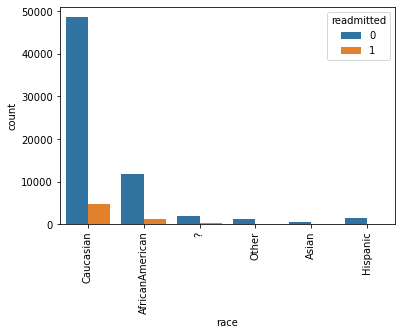

****Null values present**** 2.72 %
-------------------------------------------------- 
 --------------------------------------------------


In [22]:
data_check(all_cols[0])



* missing values can be added to others category
* this is nominal data so we can apply one hot encoding







In [23]:
data['race'] = data['race'].replace({'?':'Other'})

In [24]:
data['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: race, dtype: int64

In [25]:
dummy_encode.add('race')

feature : gender
nunique = 3
unique values = ['Female' 'Male' 'Unknown/Invalid']
Female            :38025    :  53.17%
Male              :33490    :  46.83%
Unknown/Invalid   :  3    :    0.0%


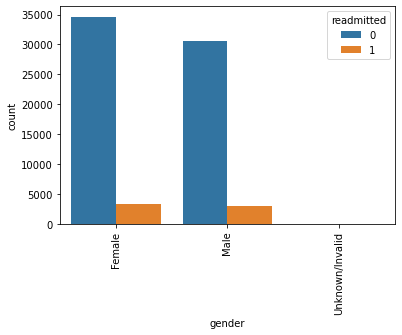

-------------------------------------------------- 
 --------------------------------------------------


In [26]:
data_check(all_cols[1])

* we can drop the 3 records that have unknown or invalid gender

In [27]:
data['gender'] = data['gender'].replace({'Female':1,'Male':0}).astype('object')

In [28]:
data.drop(data[data['gender']=='Unknown/Invalid'].index,axis=0,inplace=True)

1    38025
0    33490
Name: gender, dtype: int64
data_type =object


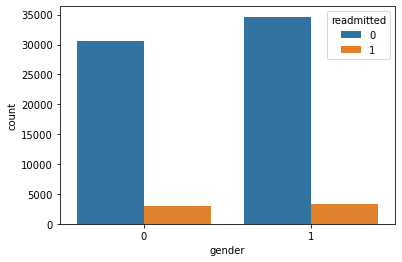

In [29]:
print(data['gender'].value_counts())
print('data_type ={}'.format(data['gender'].dtype))
sns.countplot(data['gender'],hue=data['readmitted'])
plt.show()

feature : age
nunique = 10
unique values = ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
[0-10)            :154    :   0.22%
[10-20)           :535    :   0.75%
[20-30)           :1127    :   1.58%
[30-40)           :2699    :   3.77%
[40-50)           :6878    :   9.62%
[50-60)           :12466    :  17.43%
[60-70)           :15959    :  22.32%
[70-80)           :18208    :  25.46%
[80-90)           :11589    :   16.2%
[90-100)          :1900    :   2.66%


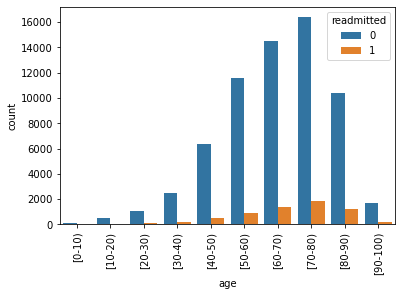

-------------------------------------------------- 
 --------------------------------------------------


In [30]:
data_check(all_cols[2])

* bins are good, we can just repplace the names of bins

In [31]:
data['age'] = data['age'].replace({'[0-10)':0, '[10-20)':0, '[20-30)':0, '[30-40)':1, '[40-50)':1, '[50-60)':1, '[60-70)':2, '[70-80)':2, '[80-90)':3, '[90-100)':3}).astype('object')

In [32]:
data['age'].value_counts()

2    34167
1    22043
3    13489
0     1816
Name: age, dtype: int64

2    34167
1    22043
3    13489
0     1816
Name: age, dtype: int64
data_type =object


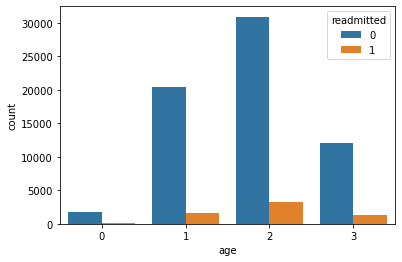

In [33]:
print(data['age'].value_counts())
print('data_type ={}'.format(data['age'].dtype))
sns.countplot(data['age'],hue=data['readmitted'])
plt.show()

feature : weight
nunique = 10
unique values = ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
?                 :68662    :  96.01%
[75-100)          :1195    :   1.67%
[50-75)           :781    :   1.09%
[0-25)            : 46    :   0.06%
[100-125)         :566    :   0.79%
[25-50)           : 89    :   0.12%
[125-150)         :131    :   0.18%
[175-200)         :  9    :   0.01%
[150-175)         : 33    :   0.05%
>200              :  3    :    0.0%


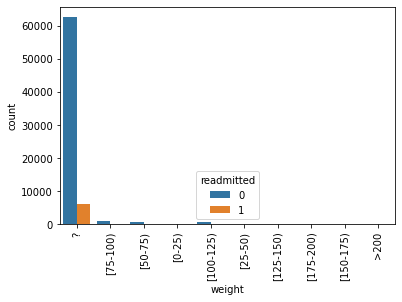

****Null values present**** 96.01 %
-------------------------------------------------- 
 --------------------------------------------------


In [34]:
data_check(all_cols[3])

* This feature has 96% null values.. it is recommended to drop the feature instead of imputing missing values.

In [35]:
to_drop.add('weight')

feature : admission_type_id
nunique = 8
unique values = [6 1 2 3 4 5 8 7]
                 6:4588    :   6.42%
                 1:36488    :  51.02%
                 2:13028    :  18.22%
                 3:13916    :  19.46%
                 4:  9    :   0.01%
                 5:3174    :   4.44%
                 8:291    :   0.41%
                 7: 21    :   0.03%


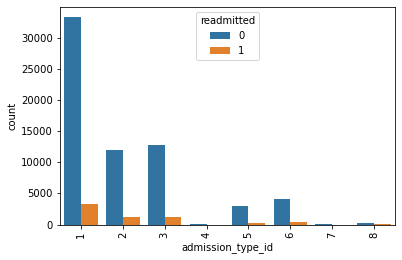

-------------------------------------------------- 
 --------------------------------------------------


In [36]:
data_check(all_cols[4])

* the indipendent unique values can be grouped together
* 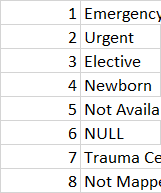
* Emergency, Urgent and Trauma can be grouped together
* NULL, not mapped and not available can be grouped together

In [37]:
data['admission_type_id'] = data['admission_type_id'].replace({2:1,7:1,6:5,8:5,4:3})

In [38]:
dummy_encode.add('admission_type_id')

In [39]:
data['admission_type_id'].value_counts()

1    49537
3    13925
5     8053
Name: admission_type_id, dtype: int64

feature : discharge_disposition_id
nunique = 26
unique values = [25  1  3  6  2  5 11  7 10 14  4 18  8 12 13 17 16 22 23  9 15 20 28 24
 19 27]
                25:778    :   1.09%
                 1:44315    :  61.97%
                 3:8784    :  12.28%
                 6:8289    :  11.59%
                 2:1539    :   2.15%
                 5:913    :   1.28%
                11:1077    :   1.51%
                 7:409    :   0.57%
                10:  6    :   0.01%
                14:218    :    0.3%
                 4:541    :   0.76%
                18:2474    :   3.46%
                 8: 73    :    0.1%
                12:  2    :    0.0%
                13:243    :   0.34%
                17:  8    :   0.01%
                16:  3    :    0.0%
                22:1409    :   1.97%
                23:260    :   0.36%
                 9:  9    :   0.01%
                15: 40    :   0.06%
                20:  1    :    0.0%
                28: 90    :   0.13%
                24:

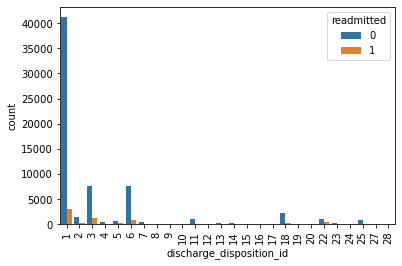

-------------------------------------------------- 
 --------------------------------------------------


In [40]:
data_check(all_cols[5])

* 1,6,8 are taken as '1' since all represents or relates to discharge/transferred to home in some sort of way.
* 28,29 is taken as '28' since they both relates to hosp with different abilities.
* 2,3,4,5,22,23,24,30 are take as '2' since SNF IS skilled nursing facilities, ICF is Intermediate Care Facility where others are referring to care units.
* 10,12,15,16,17 are taken as 10 where outpatients means"a patient who attends a hospital for treatment without staying there overnight." and many are referring to outpatients. Neonate means "a newborn child " where as per condition it is dischared to another hospital later so it is also considered here.
* 18,25,26 deals with null or unknows data entries.
* 7 isLeft AMA.
* 9 is	Admitted as an inpatient to this hospital.
* 27 is	Discharged/transferred to a federal health care facility.

In [41]:
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({6:1,8:1})
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({29:28})
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({3:2,4:2,5:2,22:2,23:2,24:2,27:2,30:2})
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({12:10,15:10,16:10,17:10})
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({25:18,26:18})
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace({11:13,14:13,19:13,20:13})


1     52677
2     13474
18     3252
13     1545
7       409
28       90
10       59
9         9
Name: discharge_disposition_id, dtype: int64


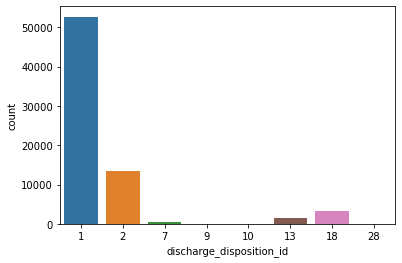

In [42]:
print(data['discharge_disposition_id'].value_counts())
sns.countplot(data['discharge_disposition_id'])
plt.show()

In [43]:
dummy_encode.add('discharge_disposition_id')

feature : admission_source_id
nunique = 17
unique values = [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
                 1:22006    :  30.77%
                 7:38288    :  53.54%
                 2:926    :   1.29%
                 4:2583    :   3.61%
                 5:545    :   0.76%
                 6:1801    :   2.52%
                20:155    :   0.22%
                 3:138    :   0.19%
                17:4949    :   6.92%
                 8: 12    :   0.02%
                 9: 95    :   0.13%
                14:  2    :    0.0%
                10:  7    :   0.01%
                22:  4    :   0.01%
                11:  1    :    0.0%
                25:  2    :    0.0%
                13:  1    :    0.0%


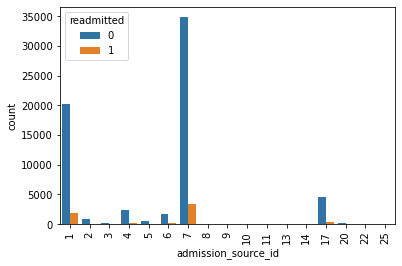

-------------------------------------------------- 
 --------------------------------------------------


In [44]:
data_check(all_cols[6])

* 1,2,3 are referals, grouped as '1'.
* 9,15,17,20,21 are unknown data, grouped as '9'.
* 12,13,14 are sick baby, grouped as '12'.
* 4,5,6,10,22,25 are related to facility or care units, grouped as '4'.

In [45]:
data['admission_source_id'] = data['admission_source_id'].replace({11:1,2:1,3:1})
data['admission_source_id'] = data['admission_source_id'].replace({15:9,17:9,20:9,21:9,8:9})
data['admission_source_id'] = data['admission_source_id'].replace({13:12,14:12})
data['admission_source_id'] = data['admission_source_id'].replace({5:4,6:4,10:4,22:4,25:4})

7     38288
1     23071
9      5211
4      4942
12        3
Name: admission_source_id, dtype: int64


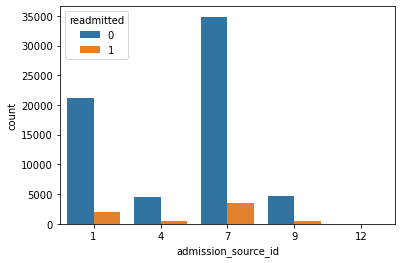

In [46]:
print(data['admission_source_id'].value_counts())
sns.countplot(data['admission_source_id'],hue=data['readmitted'])
plt.show()

In [47]:
dummy_encode.add('admission_source_id')

feature : time_in_hospital
nunique = 14
unique values = [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
                 1:10715    :  14.98%
                 3:12701    :  17.76%
                 2:12397    :  17.33%
                 4:9567    :  13.38%
                 5:6839    :   9.56%
                13:795    :   1.11%
                12:955    :   1.34%
                 9:1990    :   2.78%
                 7:3999    :   5.59%
                10:1558    :   2.18%
                 6:5171    :   7.23%
                11:1241    :   1.74%
                 8:2918    :   4.08%
                14:669    :   0.94%


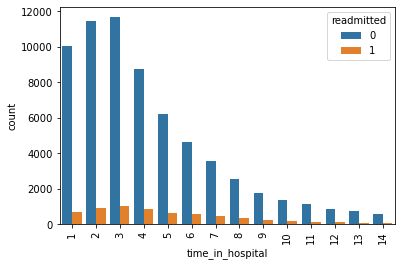

-------------------------------------------------- 
 --------------------------------------------------


In [48]:
data_check(all_cols[7])

In [49]:
data['time_in_hospital'] = data['time_in_hospital'].replace({1:0,2:0,3:0,4:1,5:1,6:1,7:2,8:2,9:2,10:3,11:3,12:3,13:3,14:3}).astype('object')

0    35813
1    21577
2     8907
3     5218
Name: time_in_hospital, dtype: int64
data_type =object


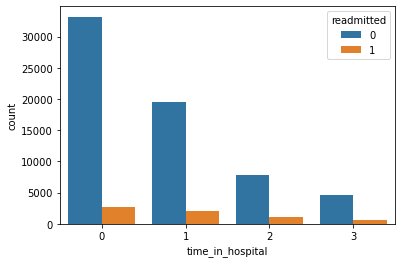

In [50]:
print(data['time_in_hospital'].value_counts())
print('data_type ={}'.format(data['time_in_hospital'].dtype))
sns.countplot(data['time_in_hospital'],hue=data['readmitted'])
plt.show()

* no changes required

feature : payer_code
nunique = 18
unique values = ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
?                 :31042    :  43.41%
MC                :20414    :  28.55%
MD                :2197    :   3.07%
HM                :4022    :   5.62%
UN                :1879    :   2.63%
BC                :3432    :    4.8%
SP                :3347    :   4.68%
CP                :1984    :   2.77%
SI                : 37    :   0.05%
DM                :374    :   0.52%
CM                :1334    :   1.87%
CH                :117    :   0.16%
PO                :463    :   0.65%
WC                :117    :   0.16%
OT                : 65    :   0.09%
OG                :658    :   0.92%
MP                : 32    :   0.04%
FR                :  1    :    0.0%


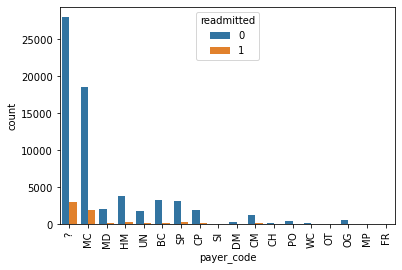

****Null values present**** 43.41 %
-------------------------------------------------- 
 --------------------------------------------------


In [51]:
data_check(all_cols[8])

* payer_code has high number of null values(43.4%) hence we will remove the feature rather than imputing it.

In [52]:
to_drop.add('payer_code')

In [53]:
data_check(all_cols[9])

feature : medical_specialty
nunique = 71
unique values = ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Anesthesiology-Pediatric' 'Radiology'
 'Pediatrics-Hematology-Oncology' 'Psychology' 'Neurology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Thoracic'
 'Surgery-PlasticwithinHeadandNeck' 'Surgery-Plastic' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'PhysicalMedicineandRehabilitation' 'InfectiousDiseases'
 'AllergyandImmunology' 'Surgery-Maxillofacial' 'Denti

* Medical_speciality has high number of null values(48.07%) hence we will remove the feature rather than imputing it.

In [54]:
to_drop.add('medical_specialty')

In [55]:
data_check(all_cols[10])

feature : num_lab_procedures
nunique = 116
unique values = [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105  86  98
  20   5   6   8 100   7  89  91  94  92   4 101 102  99 114 111 107 108
 106 104 109 120 113 132 121 118]
****unique values greater than 50****
-------------------------------------------------- 
 --------------------------------------------------


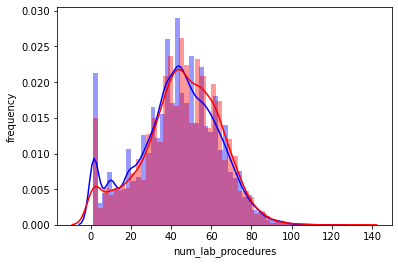

In [56]:
sns.distplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',label='Not Readmitted')
sns.distplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',label='Readmitted')
plt.xlabel('num_lab_procedures')
plt.ylabel('frequency')
plt.show()

* no changes required

feature : num_procedures
nunique = 7
unique values = [0 5 1 6 2 3 4]
                 0:31430    :  43.95%
                 5:2439    :   3.41%
                 1:14302    :   20.0%
                 6:3956    :   5.53%
                 2:9149    :  12.79%
                 3:7183    :  10.04%
                 4:3056    :   4.27%


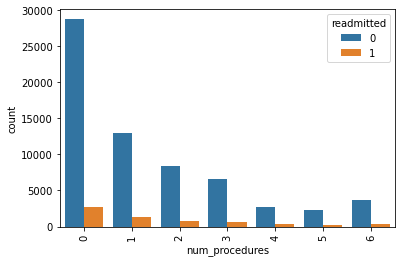

-------------------------------------------------- 
 --------------------------------------------------


In [57]:
data_check(all_cols[11])

* no changes required

In [58]:
data_check(all_cols[12])

feature : num_medications
nunique = 75
unique values = [ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 47 44 53 57 48 62 56 59 60 63 55 58 70 67 64 69 65 66 68 81 79
 75 72 74]
****unique values greater than 50****
-------------------------------------------------- 
 --------------------------------------------------


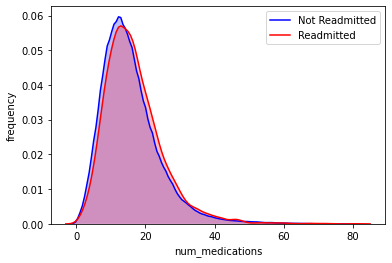

In [59]:
sns.kdeplot(data.loc[(data['readmitted'] == 0),'num_medications'] , color='b',shade=True,label='Not Readmitted')
sns.kdeplot(data.loc[(data['readmitted'] == 1),'num_medications'] , color='r',shade=True,label='Readmitted')
plt.xlabel('num_medications')
plt.ylabel('frequency')
plt.show()

feature : number_outpatient
nunique = 33
unique values = [ 0  2  1  5  7  3  8  4 12  9 11  6 20 15 10 13 14 16 21 35 29 18 19 27
 22 24 42 36 26 33 17 25 23]
                 0:62209    :  86.99%
                 2:2025    :   2.83%
                 1:4867    :   6.81%
                 5:288    :    0.4%
                 7: 73    :    0.1%
                 3:1116    :   1.56%
                 8: 57    :   0.08%
                 4:585    :   0.82%
                12: 14    :   0.02%
                 9: 37    :   0.05%
                11: 19    :   0.03%
                 6:128    :   0.18%
                20:  4    :   0.01%
                15: 10    :   0.01%
                10: 28    :   0.04%
                13: 13    :   0.02%
                14: 10    :   0.01%
                16:  8    :   0.01%
                21:  2    :    0.0%
                35:  1    :    0.0%
                29:  1    :    0.0%
                18:  2    :    0.0%
                19:  1    :    0.0%
        

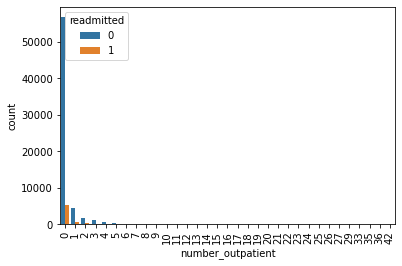

-------------------------------------------------- 
 --------------------------------------------------


In [60]:
data_check(all_cols[13])

* no changes required

feature : number_emergency
nunique = 18
unique values = [ 0  1  2  4  9  5  3  6  8  7 13 42 10 25 11 37 20 16]
                 0:66311    :  92.72%
                 1:3965    :   5.54%
                 2:804    :   1.12%
                 4: 96    :   0.13%
                 9:  4    :   0.01%
                 5: 33    :   0.05%
                 3:246    :   0.34%
                 6: 26    :   0.04%
                 8:  9    :   0.01%
                 7:  8    :   0.01%
                13:  1    :    0.0%
                42:  1    :    0.0%
                10:  5    :   0.01%
                25:  1    :    0.0%
                11:  2    :    0.0%
                37:  1    :    0.0%
                20:  1    :    0.0%
                16:  1    :    0.0%


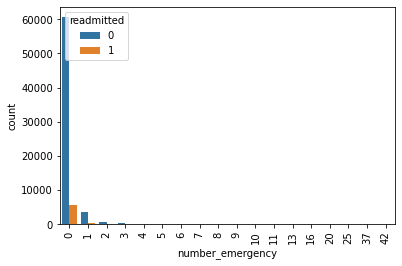

-------------------------------------------------- 
 --------------------------------------------------


In [61]:
data_check(all_cols[14])

* no changes required

feature : number_inpatient
nunique = 13
unique values = [ 0  1  2  3  5  4  6  9  8  7 11 10 12]
                 0:63074    :   88.2%
                 1:5962    :   8.34%
                 2:1547    :   2.16%
                 3:489    :   0.68%
                 5:102    :   0.14%
                 4:236    :   0.33%
                 6: 56    :   0.08%
                 9:  8    :   0.01%
                 8: 13    :   0.02%
                 7: 19    :   0.03%
                11:  2    :    0.0%
                10:  5    :   0.01%
                12:  2    :    0.0%


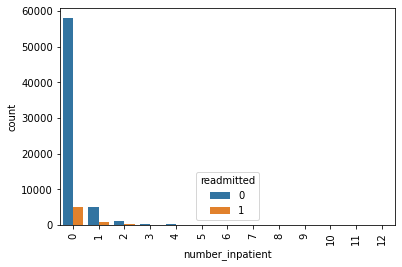

-------------------------------------------------- 
 --------------------------------------------------


In [62]:
data_check(all_cols[15])

* no changes required

* num_outpatient, num_emergency, num_inpatient can be added togeather as single feature called crital count

In [63]:
data_check(all_cols[16])

feature : diag_1
nunique = 697
unique values = ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '564' '812' '38' '590' '556' '578'
 '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558' '574'
 '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332' '562'
 '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625' '571'
 '738' '593' '250.42' '807' '456' '446' '575' '250.41' '820' '515' '780'
 '250.22' '995' '235' '250.82' '721' '787' '162' '724' '282' '514' 'V55'
 '281' '250.33' '466' '435' '250.12' 'V53' '789' '566' '822' '191' '557'
 '733' '198' '455' '711' '482' '202' '280' '553' '225' '154' '441'
 '250.81' '349' '?' '962' '592' '507' '386' '156' '200' '728' '348' '459'
 '426' '607

In [64]:
data_check(all_cols[17])

feature : diag_2
nunique = 726
unique values = ['?' '250.01' '250' '250.43' '157' '411' '492' '427' '198' '403' '288'
 '998' '507' '174' '425' '456' '401' '715' '496' '428' '585' '250.02'
 '410' '999' '996' '135' '244' '41' '571' '276' '997' '599' '424' '491'
 '553' '707' '286' '440' '493' '242' '70' 'V45' '250.03' '357' '511' '196'
 '396' '414' '250.52' '577' '535' '413' '285' '53' '780' '518' '150' '566'
 '250.6' '867' '486' 'V15' '8' '788' '340' '574' '581' '228' '530'
 '250.82' '786' '294' '567' '785' '512' '305' '729' '250.51' '280' '648'
 '560' '618' '444' '38' 'V10' '578' '277' '781' '250.42' '278' '426' '584'
 '462' '402' '153' '272' '733' '34' '881' '203' '250.41' '293' '245'
 '250.12' '558' '787' '342' '573' '626' '303' '250.53' '458' '710' '415'
 'V42' '284' '569' '759' '112' '292' '435' '682' '290' '250.13' '250.93'
 '642' '536' '398' '319' '711' 'E878' '446' '255' 'V44' '250.7' '300'
 '562' '162' '287' '789' '790' '591' '200' '154' '117' '847' '852'
 '250.83' '250.11' '816

In [65]:
data_check(all_cols[18])

feature : diag_3
nunique = 759
unique values = ['?' '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427'
 '627' '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276'
 '482' '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02'
 '305' '707' '496' '599' '715' '424' '518' '553' '794' '411' 'V42' '531'
 '511' '490' '562' '250.8' '250.7' '250.52' '784' '491' '581' '420' '8'
 '724' '730' '789' '131' '250.82' '999' '41' '493' '250.03' '786' '529'
 'E888' '425' '595' '303' '560' '711' '492' '332' '296' '438' '362'
 '250.4' '654' '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810'
 '280' '440' '785' '588' '569' '272' '997' '250.43' '918' '584' '54' '788'
 '426' '722' '250.92' '196' '461' '535' '787' '891' '284' '458' '648'
 '780' '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782' '473'
 '455' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '733' '507'
 '525' '250.53' '397' '572' '805' '453' '331' '736' '402' '591' '576'
 '465' '533' '703'

***ICD-9 codes***
* The following is a list of codes for International Statistical Classification of Diseases and Related Health Problems.

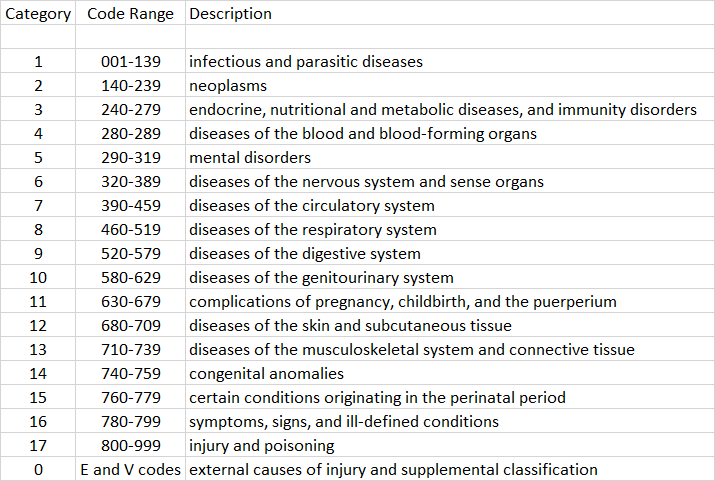

* we are grouping the codes based on this range as per ICD-9 code.
* source : https://en.wikipedia.org/wiki/List_of_ICD-9_codes

In [66]:
check_df = data[['diag_1','diag_2','diag_3']]

check_df['diag1'] = check_df['diag_1']
check_df['diag2'] = check_df['diag_2']
check_df['diag3'] = check_df['diag_3']

check_df.loc[check_df['diag_1'].str.contains('V'), ['diag1']] = 0
check_df.loc[check_df['diag_1'].str.contains('E'), ['diag1']] = 0
check_df.loc[check_df['diag_2'].str.contains('V'), ['diag2']] = 0
check_df.loc[check_df['diag_2'].str.contains('E'), ['diag2']] = 0
check_df.loc[check_df['diag_3'].str.contains('V'), ['diag3']] = 0
check_df.loc[check_df['diag_3'].str.contains('E'), ['diag3']] = 0

check_df['diag1'] = check_df['diag1'].replace('?', -1)
check_df['diag2'] = check_df['diag2'].replace('?', -1)
check_df['diag3'] = check_df['diag3'].replace('?', -1)

check_df['diag1'] = check_df['diag1'].astype(float)
check_df['diag2'] = check_df['diag2'].astype(float)
check_df['diag3'] = check_df['diag3'].astype(float)

check_df.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)


* we create a new dataframe with diagnosis features, we convert the codes with E and V into '0' and replace '?' with '-1'.

* also we change the data type to float.

In [67]:
for i in ['diag1','diag2','diag3']:
  for index, row in check_df.iterrows():
      if (row[i] >= 1 and row[i] < 140):
          check_df.loc[index, i] = 1
      elif (row[i] >= 140 and row[i] < 240):
          check_df.loc[index, i] = 2
      elif (row[i] >= 240 and row[i] < 280):
          check_df.loc[index, i] = 3
      elif (row[i] >= 280 and row[i] < 290):
          check_df.loc[index, i] = 4
      elif (row[i] >= 290 and row[i] < 320):
          check_df.loc[index, i] = 5
      elif (row[i] >= 320 and row[i] < 390):
          check_df.loc[index, i] = 6
      elif (row[i] >= 390 and row[i] < 460):
          check_df.loc[index, i] = 7
      elif (row[i] >= 460 and row[i] < 520):
          check_df.loc[index, i] = 8
      elif (row[i] >= 520 and row[i] < 580):
          check_df.loc[index, i] = 9
      elif (row[i] >= 580 and row[i] < 630):
          check_df.loc[index, i] = 10
      elif (row[i] >= 630 and row[i] < 680):
          check_df.loc[index, i] = 11
      elif (row[i] >= 680 and row[i] < 710):
          check_df.loc[index, i] = 12
      elif (row[i] >= 710 and row[i] < 740):
          check_df.loc[index, i] = 13
      elif (row[i] >= 740 and row[i] < 760):
          check_df.loc[index, i] = 14
      elif (row[i] >= 760 and row[i] < 780):
          check_df.loc[index, i] = 15
      elif (row[i] >= 780 and row[i] < 800):
          check_df.loc[index, i] = 16
      elif (row[i] >= 800 and row[i] < 1000):
          check_df.loc[index, i] = 17
      else:
          check_df.loc[index, i] = 0

* here we group the values based on the code range as per ICD-9 codes.

In [68]:
check_df

,diag1,diag2,diag3
0,3.0,0.0,0.0
1,3.0,3.0,3.0
2,11.0,3.0,0.0
3,1.0,3.0,7.0
4,2.0,2.0,3.0
...,...,...,...
71513,9.0,9.0,3.0
71514,10.0,10.0,8.0
71515,17.0,10.0,7.0
71516,5.0,1.0,5.0


7.0     21820
3.0      7685
8.0      6736
9.0      6403
16.0     5530
17.0     4777
13.0     4080
10.0     3488
2.0      2742
1.0      1818
12.0     1789
5.0      1548
0.0       939
6.0       876
4.0       657
11.0      586
14.0       41
Name: diag1, dtype: int64


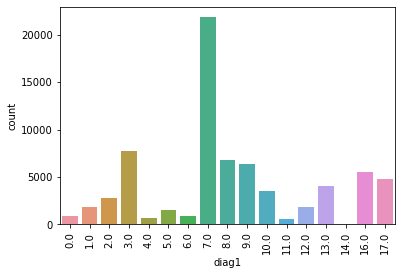

In [69]:
print(check_df['diag1'].value_counts())
sns.countplot(check_df['diag1'])
plt.xticks(rotation=90)
plt.show()

7.0     22205
3.0     15482
8.0      6761
10.0     5180
16.0     3249
9.0      2756
12.0     2253
4.0      2108
0.0      2094
5.0      1866
17.0     1856
2.0      1750
13.0     1297
1.0      1296
6.0       926
11.0      353
14.0       83
Name: diag2, dtype: int64


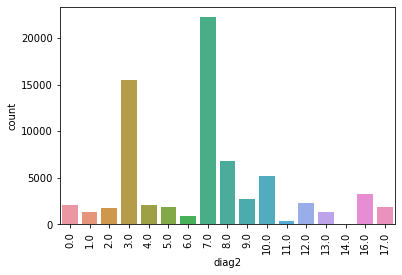

In [70]:
print(check_df['diag2'].value_counts())
sns.countplot(check_df['diag2'])
plt.xticks(rotation=90)
plt.show()

7.0     21049
3.0     19237
0.0      4765
8.0      4466
10.0     3937
16.0     3152
9.0      2488
5.0      2164
4.0      1752
12.0     1532
17.0     1442
13.0     1378
6.0      1281
1.0      1262
2.0      1262
11.0      273
14.0       75
Name: diag3, dtype: int64


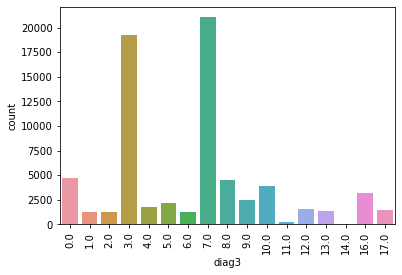

In [71]:
print(check_df['diag3'].value_counts())
sns.countplot(check_df['diag3'])
plt.xticks(rotation=90)
plt.show()

In [72]:
data['diag_1'] = check_df['diag1']
data['diag_2'] = check_df['diag2']
data['diag_3'] = check_df['diag3']

In [73]:
dummy_encode.update(('diag_1','diag_2','diag_3'))

feature : number_diagnoses
nunique = 16
unique values = [ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
                 1:193    :   0.27%
                 9:31739    :  44.38%
                 6:7691    :  10.75%
                 7:7609    :  10.64%
                 5:8940    :   12.5%
                 8:7560    :  10.57%
                 3:2364    :   3.31%
                 4:4463    :   6.24%
                 2:881    :   1.23%
                16: 31    :   0.04%
                12:  7    :   0.01%
                13: 10    :   0.01%
                15:  7    :   0.01%
                10:  9    :   0.01%
                11:  6    :   0.01%
                14:  5    :   0.01%


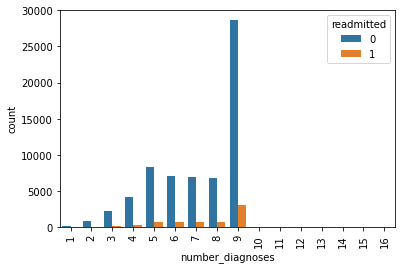

-------------------------------------------------- 
 --------------------------------------------------


In [74]:
data_check(all_cols[19])

In [75]:
data['number_diagnoses'] = data['number_diagnoses'].replace({1:0,2:0,3:0,4:0,5:1,6:1,7:1,8:1,9:1,10:2,11:2,12:2,
                                                             13:2,14:2,15:2,16:2}).astype('object')

1    63539
0     7901
2       75
Name: number_diagnoses, dtype: int64
data_type =object


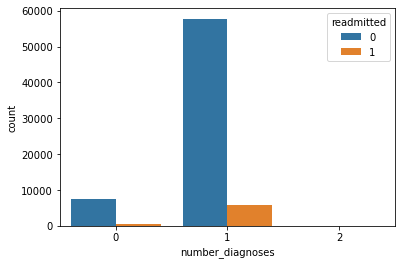

In [76]:
print(data['number_diagnoses'].value_counts())
print('data_type ={}'.format(data['number_diagnoses'].dtype))
sns.countplot(data['number_diagnoses'],hue=data['readmitted'])
plt.show()

feature : max_glu_serum
nunique = 4
unique values = ['None' '>300' 'Norm' '>200']
None              :68059    :  95.17%
>300              :756    :   1.06%
Norm              :1731    :   2.42%
>200              :969    :   1.35%


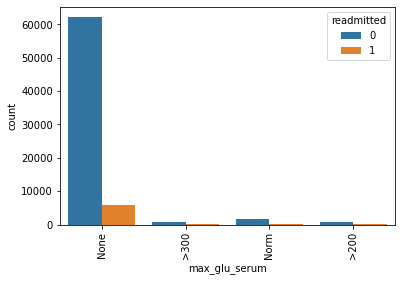

-------------------------------------------------- 
 --------------------------------------------------


In [77]:
data_check(all_cols[20])

![alt text](https://www.mymed.com/image/2387/MedicalArticle/700)

* based on Mean Bloog Glucose we can group >200 and >300 as '1' and normal and none as '0'

In [78]:
data['max_glu_serum'] = data['max_glu_serum'].replace({'>200': 1,'>300': 1,'Norm': 0,'None':0}).astype('object')

0    69790
1     1725
Name: max_glu_serum, dtype: int64
data_type =object


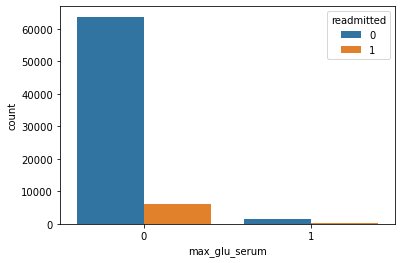

In [79]:
print(data['max_glu_serum'].value_counts())
print('data_type ={}'.format(data['max_glu_serum'].dtype))
sns.countplot(data['max_glu_serum'],hue=data['readmitted'])
plt.show()

feature : A1Cresult
nunique = 4
unique values = ['None' '>7' '>8' 'Norm']
None              :58529    :  81.84%
>7                :2891    :   4.04%
>8                :6304    :   8.81%
Norm              :3791    :    5.3%


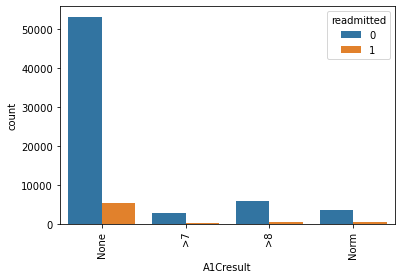

-------------------------------------------------- 
 --------------------------------------------------


In [80]:
data_check(all_cols[21])

![alt text](https://www.mymed.com/image/2387/MedicalArticle/700)

* based on HBA-1C test core we can group >7 and >8 as '1' and normal and none as '0'.

In [81]:
data['A1Cresult'] = data['A1Cresult'].replace({'>7': 1,'>8': 1,'Norm': 0,'None':0}).astype('object')

0    62320
1     9195
Name: A1Cresult, dtype: int64
data_type =object


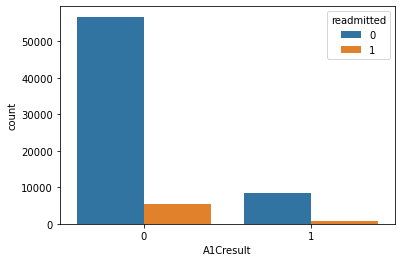

In [82]:
print(data['A1Cresult'].value_counts())
print('data_type ={}'.format(data['A1Cresult'].dtype))
sns.countplot(data['A1Cresult'],hue=data['readmitted'])
plt.show()

In [83]:
medications = all_cols[22:45]

feature : metformin
nunique = 4
unique values = ['No' 'Steady' 'Up' 'Down']
No                :56525    :  79.04%
Steady            :13717    :  19.18%
Up                :838    :   1.17%
Down              :435    :   0.61%


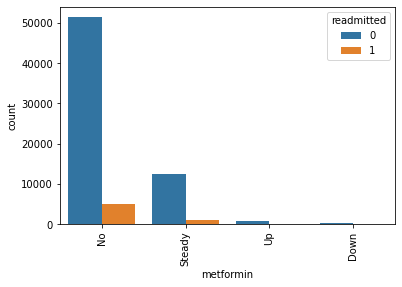

-------------------------------------------------- 
 --------------------------------------------------
feature : repaglinide
nunique = 4
unique values = ['No' 'Up' 'Steady' 'Down']
No                :70589    :  98.71%
Up                : 73    :    0.1%
Steady            :824    :   1.15%
Down              : 29    :   0.04%


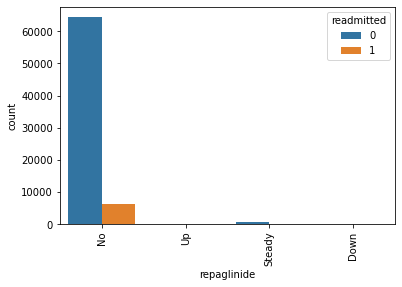

-------------------------------------------------- 
 --------------------------------------------------
feature : nateglinide
nunique = 4
unique values = ['No' 'Steady' 'Down' 'Up']
No                :71017    :   99.3%
Steady            :474    :   0.66%
Down              :  8    :   0.01%
Up                : 16    :   0.02%


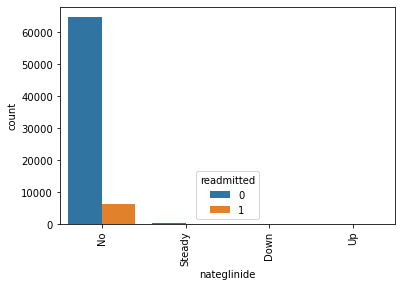

-------------------------------------------------- 
 --------------------------------------------------
feature : chlorpropamide
nunique = 4
unique values = ['No' 'Steady' 'Down' 'Up']
No                :71443    :   99.9%
Steady            : 67    :   0.09%
Down              :  1    :    0.0%
Up                :  4    :   0.01%


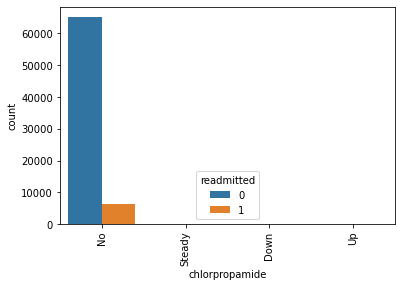

-------------------------------------------------- 
 --------------------------------------------------
feature : glimepiride
nunique = 4
unique values = ['No' 'Steady' 'Down' 'Up']
No                :67770    :  94.76%
Steady            :3372    :   4.72%
Down              :138    :   0.19%
Up                :235    :   0.33%


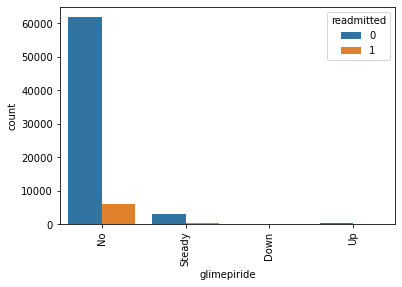

-------------------------------------------------- 
 --------------------------------------------------
feature : acetohexamide
nunique = 2
unique values = ['No' 'Steady']
No                :71514    :  100.0%
Steady            :  1    :    0.0%


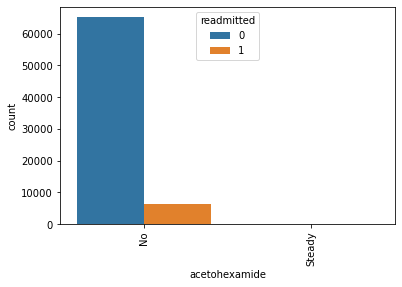

-------------------------------------------------- 
 --------------------------------------------------
feature : glipizide
nunique = 4
unique values = ['No' 'Steady' 'Up' 'Down']
No                :62410    :  87.27%
Steady            :8149    :  11.39%
Up                :578    :   0.81%
Down              :378    :   0.53%


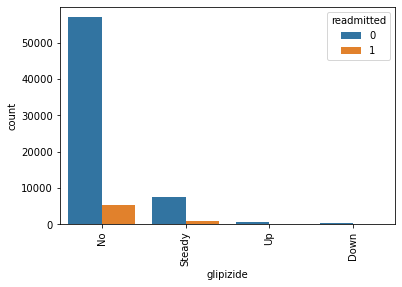

-------------------------------------------------- 
 --------------------------------------------------
feature : glyburide
nunique = 4
unique values = ['No' 'Steady' 'Up' 'Down']
No                :63661    :  89.02%
Steady            :6812    :   9.53%
Up                :621    :   0.87%
Down              :421    :   0.59%


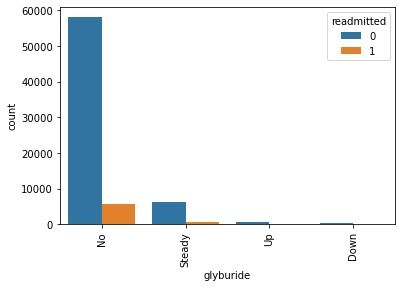

-------------------------------------------------- 
 --------------------------------------------------
feature : tolbutamide
nunique = 2
unique values = ['No' 'Steady']
No                :71496    :  99.97%
Steady            : 19    :   0.03%


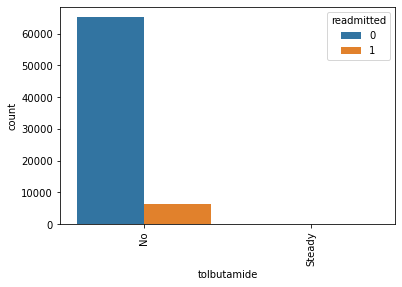

-------------------------------------------------- 
 --------------------------------------------------
feature : pioglitazone
nunique = 4
unique values = ['No' 'Steady' 'Up' 'Down']
No                :66208    :  92.58%
Steady            :5046    :   7.06%
Up                :180    :   0.25%
Down              : 81    :   0.11%


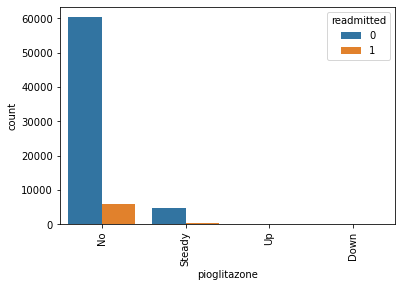

-------------------------------------------------- 
 --------------------------------------------------
feature : rosiglitazone
nunique = 4
unique values = ['No' 'Steady' 'Up' 'Down']
No                :66815    :  93.43%
Steady            :4489    :   6.28%
Up                :136    :   0.19%
Down              : 75    :    0.1%


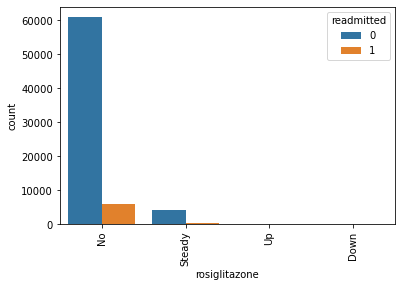

-------------------------------------------------- 
 --------------------------------------------------
feature : acarbose
nunique = 3
unique values = ['No' 'Steady' 'Up']
No                :71313    :  99.72%
Steady            :192    :   0.27%
Up                : 10    :   0.01%


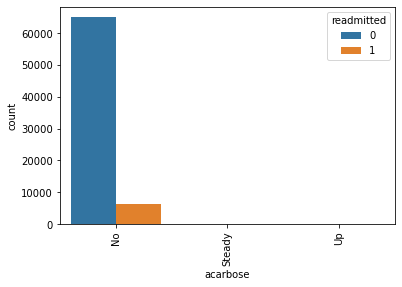

-------------------------------------------------- 
 --------------------------------------------------
feature : miglitol
nunique = 4
unique values = ['No' 'Steady' 'Down' 'Up']
No                :71495    :  99.97%
Steady            : 18    :   0.03%
Down              :  1    :    0.0%
Up                :  1    :    0.0%


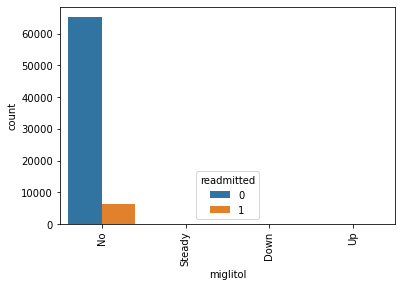

-------------------------------------------------- 
 --------------------------------------------------
feature : troglitazone
nunique = 2
unique values = ['No' 'Steady']
No                :71512    :  100.0%
Steady            :  3    :    0.0%


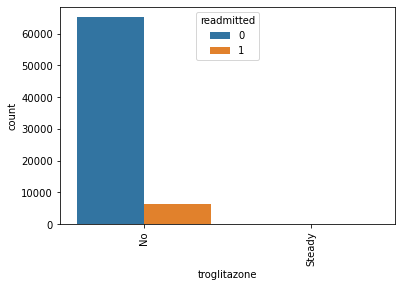

-------------------------------------------------- 
 --------------------------------------------------
feature : tolazamide
nunique = 2
unique values = ['No' 'Steady']
No                :71485    :  99.96%
Steady            : 30    :   0.04%


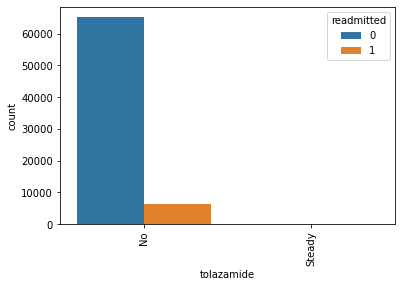

-------------------------------------------------- 
 --------------------------------------------------
feature : examide
nunique = 1
unique values = ['No']
No                :71515    :  100.0%


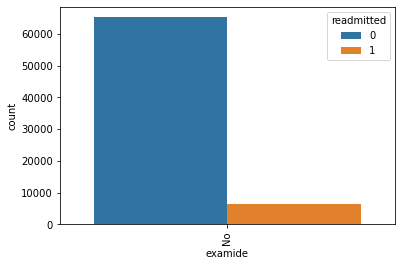

-------------------------------------------------- 
 --------------------------------------------------
feature : citoglipton
nunique = 1
unique values = ['No']
No                :71515    :  100.0%


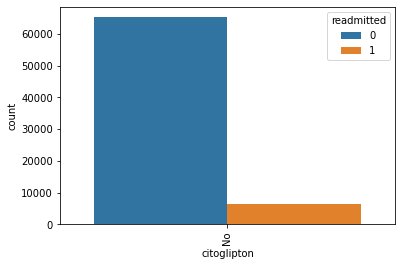

-------------------------------------------------- 
 --------------------------------------------------
feature : insulin
nunique = 4
unique values = ['No' 'Up' 'Steady' 'Down']
No                :34918    :  48.83%
Up                :6963    :   9.74%
Steady            :22129    :  30.94%
Down              :7505    :  10.49%


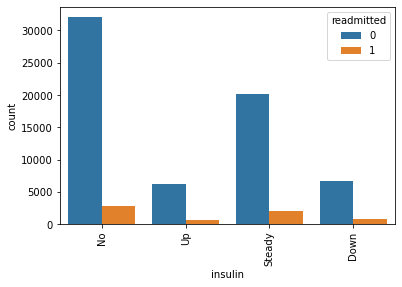

-------------------------------------------------- 
 --------------------------------------------------
feature : glyburide-metformin
nunique = 4
unique values = ['No' 'Steady' 'Down' 'Up']
No                :71013    :   99.3%
Steady            :491    :   0.69%
Down              :  4    :   0.01%
Up                :  7    :   0.01%


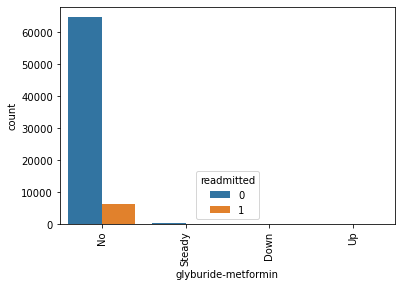

-------------------------------------------------- 
 --------------------------------------------------
feature : glipizide-metformin
nunique = 2
unique values = ['No' 'Steady']
No                :71508    :  99.99%
Steady            :  7    :   0.01%


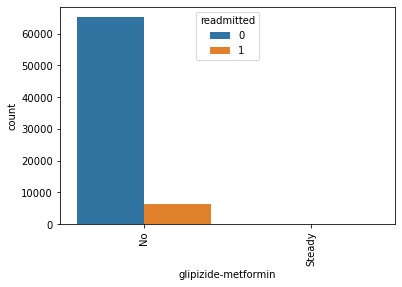

-------------------------------------------------- 
 --------------------------------------------------
feature : glimepiride-pioglitazone
nunique = 1
unique values = ['No']
No                :71515    :  100.0%


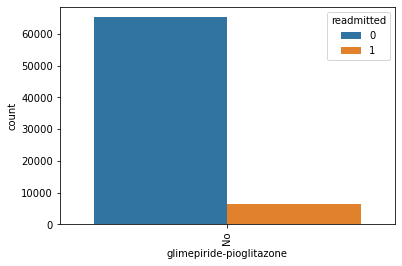

-------------------------------------------------- 
 --------------------------------------------------
feature : metformin-rosiglitazone
nunique = 2
unique values = ['No' 'Steady']
No                :71513    :  100.0%
Steady            :  2    :    0.0%


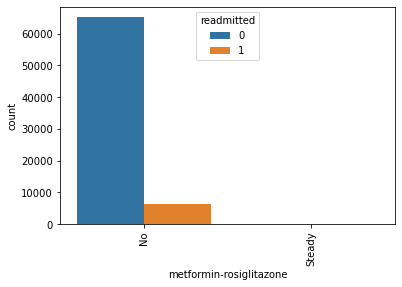

-------------------------------------------------- 
 --------------------------------------------------
feature : metformin-pioglitazone
nunique = 2
unique values = ['No' 'Steady']
No                :71514    :  100.0%
Steady            :  1    :    0.0%


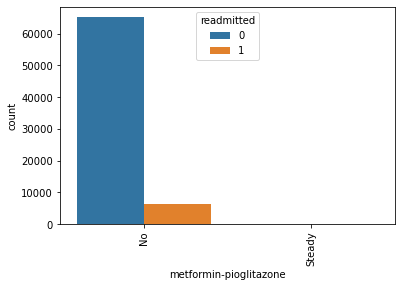

-------------------------------------------------- 
 --------------------------------------------------


In [84]:
for i in medications:
  data_check(i)

* as of now we are not removing any medication feature even though the data has a huge imbalance.
* we can remove 'examide','glimepiride-pioglitazone' and 'citoglipton' feature as it is 100% 'No' data's

In [85]:
change_med = []
for i in medications:
    data[i+'_change'] = data[i].replace({'No':0,'Down':1,'Steady':1,'Up':1})
    change_med.append(i+'_change')
    data[i] = data[i].replace({'No':0,'Down':0,'Steady':1,'Up':1}).astype('object')

In [86]:
to_drop.update(change_med)

In [87]:
to_drop.update(( 'examide','citoglipton'))

feature : change
nunique = 2
unique values = ['No' 'Ch']
No                :39493    :  55.22%
Ch                :32022    :  44.78%


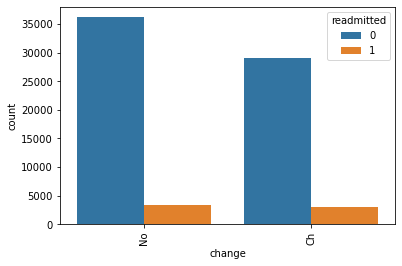

-------------------------------------------------- 
 --------------------------------------------------


In [88]:
data_check(all_cols[45])

* replace 'No' with '0' and 'Ch' with '1'

In [89]:
data['change'] = data['change'].replace({'No':0,'Ch':1}).astype('object')

0    39493
1    32022
Name: change, dtype: int64
data_type =object


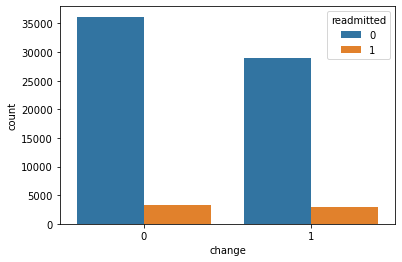

In [90]:
print(data['change'].value_counts())
print('data_type ={}'.format(data['change'].dtype))
sns.countplot(data['change'],hue=data['readmitted'])
plt.show()

feature : diabetesMed
nunique = 2
unique values = ['No' 'Yes']
No                :17198    :  24.05%
Yes               :54317    :  75.95%


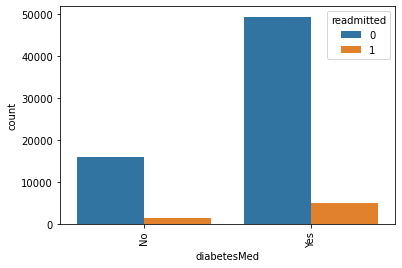

-------------------------------------------------- 
 --------------------------------------------------


In [91]:
data_check(all_cols[46])

* replace 'No' with '0' and 'Yes' with '1'

In [92]:
data['diabetesMed'] = data['diabetesMed'].replace({'No':0,'Yes':1}).astype('object')

0    39493
1    32022
Name: change, dtype: int64
data_type =object


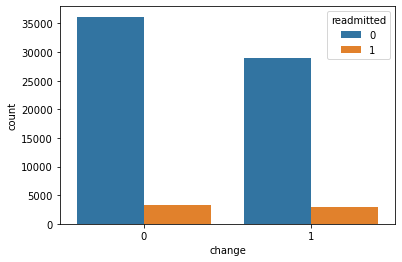

In [93]:
print(data['change'].value_counts())
print('data_type ={}'.format(data['change'].dtype))
sns.countplot(data['change'],hue=data['readmitted'])
plt.show()

In [94]:
data['critical_visits'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
to_drop.update(('number_outpatient','number_emergency','number_inpatient'))

In [95]:
data['num_med_change'] = 0

In [96]:
for i in medications:
    data['num_med_change'] = data['num_med_change'] + data[i+'_change']

In [97]:
data['num_med_change'].value_counts()

1    31944
0    17198
2    15605
3     5703
4     1011
5       50
6        4
Name: num_med_change, dtype: int64

* below are the respective features that are to be either one hot encoded or droped

In [98]:
dummy_encode

{'admission_source_id',
 'admission_type_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'discharge_disposition_id',
 'race'}

In [99]:
to_drop

{'acarbose_change',
 'acetohexamide_change',
 'chlorpropamide_change',
 'citoglipton',
 'citoglipton_change',
 'examide',
 'examide_change',
 'glimepiride-pioglitazone_change',
 'glimepiride_change',
 'glipizide-metformin_change',
 'glipizide_change',
 'glyburide-metformin_change',
 'glyburide_change',
 'insulin_change',
 'medical_specialty',
 'metformin-pioglitazone_change',
 'metformin-rosiglitazone_change',
 'metformin_change',
 'miglitol_change',
 'nateglinide_change',
 'number_emergency',
 'number_inpatient',
 'number_outpatient',
 'payer_code',
 'pioglitazone_change',
 'repaglinide_change',
 'rosiglitazone_change',
 'tolazamide_change',
 'tolbutamide_change',
 'troglitazone_change',
 'weight'}

In [100]:
data.drop(to_drop,axis=1,inplace=True)

In [101]:
data.shape

(71515, 43)

In [102]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'number_of_revisit', 'critical_visits', 'num_med_change'],
      dtype='object')

In [103]:
data.to_csv('for_tableau')

In [104]:
for i in dummy_encode:
    data[i] = data[i].astype(object)

In [105]:
dummies = pd.get_dummies(data[['admission_source_id',
 'admission_type_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'discharge_disposition_id',
 'race']],drop_first=True)

In [106]:
dummies

,admission_source_id_4,admission_source_id_7,admission_source_id_9,admission_source_id_12,admission_type_id_3,admission_type_id_5,diag_1_1.0,diag_1_2.0,diag_1_3.0,diag_1_4.0,diag_1_5.0,diag_1_6.0,diag_1_7.0,diag_1_8.0,diag_1_9.0,diag_1_10.0,diag_1_11.0,diag_1_12.0,diag_1_13.0,diag_1_14.0,diag_1_16.0,diag_1_17.0,diag_2_1.0,diag_2_2.0,diag_2_3.0,diag_2_4.0,diag_2_5.0,diag_2_6.0,diag_2_7.0,diag_2_8.0,diag_2_9.0,diag_2_10.0,diag_2_11.0,diag_2_12.0,diag_2_13.0,diag_2_14.0,diag_2_16.0,diag_2_17.0,diag_3_1.0,diag_3_2.0,diag_3_3.0,diag_3_4.0,diag_3_5.0,diag_3_6.0,diag_3_7.0,diag_3_8.0,diag_3_9.0,diag_3_10.0,diag_3_11.0,diag_3_12.0,diag_3_13.0,diag_3_14.0,diag_3_16.0,diag_3_17.0,discharge_disposition_id_2,discharge_disposition_id_7,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_13,discharge_disposition_id_18,discharge_disposition_id_28,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
71514,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
71515,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
71516,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [107]:
data.drop(dummy_encode,axis=1,inplace=True)
data = pd.concat([data,dummies],axis=1)

In [108]:
data.head(2)

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,number_of_revisit,critical_visits,num_med_change,admission_source_id_4,admission_source_id_7,admission_source_id_9,admission_source_id_12,admission_type_id_3,admission_type_id_5,diag_1_1.0,diag_1_2.0,diag_1_3.0,diag_1_4.0,diag_1_5.0,diag_1_6.0,diag_1_7.0,diag_1_8.0,diag_1_9.0,diag_1_10.0,diag_1_11.0,diag_1_12.0,diag_1_13.0,diag_1_14.0,diag_1_16.0,diag_1_17.0,diag_2_1.0,diag_2_2.0,diag_2_3.0,diag_2_4.0,diag_2_5.0,diag_2_6.0,diag_2_7.0,diag_2_8.0,diag_2_9.0,diag_2_10.0,diag_2_11.0,diag_2_12.0,diag_2_13.0,diag_2_14.0,diag_2_16.0,diag_2_17.0,diag_3_1.0,diag_3_2.0,diag_3_3.0,diag_3_4.0,diag_3_5.0,diag_3_6.0,diag_3_7.0,diag_3_8.0,diag_3_9.0,diag_3_10.0,diag_3_11.0,diag_3_12.0,diag_3_13.0,diag_3_14.0,diag_3_16.0,diag_3_17.0,discharge_disposition_id_2,discharge_disposition_id_7,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_13,discharge_disposition_id_18,discharge_disposition_id_28,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,1,0,0,41,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,0,0,59,0,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [109]:
data.shape

(71515, 101)

In [110]:
data.isna().sum().sum()

0

In [111]:
data.to_csv('cleaned_data.csv',index=False)